In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.DataFrame(np.random.randn(5, 3), 
                index=['a', 'c', 'e', 'f', 'h'],
                columns=['one', 'two', 'three'])
df

,one,two,three
a,-0.130144,-1.003936,0.973400
c,0.645567,0.749565,0.874958
e,-0.916102,0.932321,-1.109380
f,-1.271114,-0.604654,0.211032
h,0.183184,-0.871790,-2.542023


In [5]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three
a,-0.130144,-1.003936,0.973400
b,NaN,NaN,NaN
c,0.645567,0.749565,0.874958
d,NaN,NaN,NaN
e,-0.916102,0.932321,-1.109380
f,-1.271114,-0.604654,0.211032
g,NaN,NaN,NaN
h,0.183184,-0.871790,-2.542023


In [12]:
pd.isna(df2[['one','two']])

,one,two
a,False,False
b,True,True
c,False,False
d,True,True
e,False,False
f,False,False
g,True,True
h,False,False


In [13]:
pd.notna(df2[['one','two']])

,one,two
a,True,True
b,False,False
c,True,True
d,False,False
e,True,True
f,True,True
g,False,False
h,True,True


In [14]:
df2.isna()

,one,two,three
a,False,False,False
b,True,True,True
c,False,False,False
d,True,True,True
e,False,False,False
f,False,False,False
g,True,True,True
h,False,False,False


### **np.nan != np.nan**
### **None == np.nan.**

# Timestamp

In [24]:
df3 = df2.copy()
df3['timestamp'] = pd.Timestamp('20120101')
df3

,one,two,three,timestamp
a,-0.130144,-1.003936,0.973400,2012-01-01
b,NaN,NaN,NaN,2012-01-01
c,0.645567,0.749565,0.874958,2012-01-01
d,NaN,NaN,NaN,2012-01-01
e,-0.916102,0.932321,-1.109380,2012-01-01
f,-1.271114,-0.604654,0.211032,2012-01-01
g,NaN,NaN,NaN,2012-01-01
h,0.183184,-0.871790,-2.542023,2012-01-01


In [22]:
df3.loc[['a','c','h'],['one','timestamp']] = np.nan
df3

,one,two,three,timestamp
a,NaN,-1.003936,0.973400,NaT
b,NaN,NaN,NaN,2012-01-01
c,NaN,0.749565,0.874958,NaT
d,NaN,NaN,NaN,2012-01-01
e,-0.916102,0.932321,-1.109380,2012-01-01
f,-1.271114,-0.604654,0.211032,2012-01-01
g,NaN,NaN,NaN,2012-01-01
h,NaN,-0.871790,-2.542023,NaT


In [21]:
df3.get_dtype_counts()

float64           3
datetime64[ns]    1
dtype: int64

# Inserting missing data

## Numeric

In [32]:
sint = pd.Series([1, 2, 3])
sint.loc[0] = None
sint

0    NaN
1    2.0
2    3.0
dtype: float64

In [27]:
sint.loc[1] = np.nan
sint

0    NaN
1    NaN
2    3.0
dtype: float64

### Datetime

In [44]:
range_date = pd.date_range('1/3/2000', periods=11, freq='1D')
sdate = pd.Series(range_date)
sdate.loc[1] = None
sdate

0    2000-01-03
1           NaT
2    2000-01-05
3    2000-01-06
4    2000-01-07
5    2000-01-08
6    2000-01-09
7    2000-01-10
8    2000-01-11
9    2000-01-12
10   2000-01-13
dtype: datetime64[ns]

In [43]:
sdate.loc[2] = np.nan
sdate

0    2000-01-03
1           NaT
2           NaT
3    2000-01-06
4    2000-01-07
5    2000-01-08
6    2000-01-09
7    2000-01-10
8    2000-01-11
9    2000-01-12
10   2000-01-13
dtype: datetime64[ns]

### Object

In [28]:
schar = pd.Series(["a", "b", "c"])
schar.loc[0] = None
schar

0    None
1       b
2       c
dtype: object

In [30]:
schar.loc[1] = np.nan
schar

0    None
1     NaN
2       c
dtype: object

#### Object

# Filling missing data

In [46]:
fldf = df3.copy()
fldf

,one,two,three,timestamp
a,-0.130144,-1.003936,0.973400,2012-01-01
b,NaN,NaN,NaN,2012-01-01
c,0.645567,0.749565,0.874958,2012-01-01
d,NaN,NaN,NaN,2012-01-01
e,-0.916102,0.932321,-1.109380,2012-01-01
f,-1.271114,-0.604654,0.211032,2012-01-01
g,NaN,NaN,NaN,2012-01-01
h,0.183184,-0.871790,-2.542023,2012-01-01


In [47]:
fldf.fillna(0)

,one,two,three,timestamp
a,-0.130144,-1.003936,0.973400,2012-01-01
b,0.000000,0.000000,0.000000,2012-01-01
c,0.645567,0.749565,0.874958,2012-01-01
d,0.000000,0.000000,0.000000,2012-01-01
e,-0.916102,0.932321,-1.109380,2012-01-01
f,-1.271114,-0.604654,0.211032,2012-01-01
g,0.000000,0.000000,0.000000,2012-01-01
h,0.183184,-0.871790,-2.542023,2012-01-01


In [54]:
fldf.fillna('not known')

,one,two,three,timestamp
a,-0.130144,-1.00394,0.9734,2012-01-01
b,not known,not known,not known,2012-01-01
c,0.645567,0.749565,0.874958,2012-01-01
d,not known,not known,not known,2012-01-01
e,-0.916102,0.932321,-1.10938,2012-01-01
f,-1.27111,-0.604654,0.211032,2012-01-01
g,not known,not known,not known,2012-01-01
h,0.183184,-0.87179,-2.54202,2012-01-01


In [57]:
fldf.ffill()

,one,two,three,timestamp
a,-0.130144,-1.003936,0.973400,2012-01-01
b,-0.130144,-1.003936,0.973400,2012-01-01
c,0.645567,0.749565,0.874958,2012-01-01
d,0.645567,0.749565,0.874958,2012-01-01
e,-0.916102,0.932321,-1.109380,2012-01-01
f,-1.271114,-0.604654,0.211032,2012-01-01
g,-1.271114,-0.604654,0.211032,2012-01-01
h,0.183184,-0.871790,-2.542023,2012-01-01


# Filling DataFrames

In [76]:
dff = pd.DataFrame(np.random.randn(10,3), columns=list('ABC'))
dff

,A,B,C
0,0.522689,1.103796,1.161645
1,2.425469,-0.499529,0.378526
2,0.947073,0.360533,-0.350620
3,-0.596323,-0.984232,-0.646043
4,-1.386818,-0.690901,1.438209
5,0.077776,-0.234040,-0.184799
6,0.363864,0.726152,-1.428876
7,0.394018,2.088249,-0.846124
8,1.066992,-0.333688,0.364730
9,1.361042,1.617281,-2.060912


In [84]:
dff.iloc[3:5,0] = np.nan
dff.iloc[4:6,1] = np.nan
dff.iloc[5:8,2] = np.nan
dff

,A,B,C
0,0.522689,1.103796,1.161645
1,2.425469,-0.499529,0.378526
2,0.947073,0.360533,-0.350620
3,NaN,-0.984232,-0.646043
4,NaN,NaN,1.438209
5,0.077776,NaN,NaN
6,0.363864,0.726152,NaN
7,0.394018,2.088249,NaN
8,1.066992,-0.333688,0.364730
9,1.361042,1.617281,-2.060912


In [85]:
dff.fillna(dff.mean())

,A,B,C
0,0.522689,1.103796,1.161645
1,2.425469,-0.499529,0.378526
2,0.947073,0.360533,-0.350620
3,0.894866,-0.984232,-0.646043
4,0.894866,0.509820,1.438209
5,0.077776,0.509820,0.040791
6,0.363864,0.726152,0.040791
7,0.394018,2.088249,0.040791
8,1.066992,-0.333688,0.364730
9,1.361042,1.617281,-2.060912


In [86]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,0.522689,1.103796,1.161645
1,2.425469,-0.499529,0.378526
2,0.947073,0.360533,-0.350620
3,NaN,-0.984232,-0.646043
4,NaN,0.509820,1.438209
5,0.077776,0.509820,0.040791
6,0.363864,0.726152,0.040791
7,0.394018,2.088249,0.040791
8,1.066992,-0.333688,0.364730
9,1.361042,1.617281,-2.060912


In [87]:
pd.notna(dff)

,A,B,C
0,True,True,True
1,True,True,True
2,True,True,True
3,False,True,True
4,False,False,True
5,True,False,False
6,True,True,False
7,True,True,False
8,True,True,True
9,True,True,True


# Dropping Na

In [90]:
dpdf = dff.copy()
dpdf

,A,B,C
0,0.522689,1.103796,1.161645
1,2.425469,-0.499529,0.378526
2,0.947073,0.360533,-0.350620
3,NaN,-0.984232,-0.646043
4,NaN,NaN,1.438209
5,0.077776,NaN,NaN
6,0.363864,0.726152,NaN
7,0.394018,2.088249,NaN
8,1.066992,-0.333688,0.364730
9,1.361042,1.617281,-2.060912


In [91]:
dpdf.dropna()

,A,B,C
0,0.522689,1.103796,1.161645
1,2.425469,-0.499529,0.378526
2,0.947073,0.360533,-0.350620
8,1.066992,-0.333688,0.364730
9,1.361042,1.617281,-2.060912


In [93]:
dpdf.dropna(axis="index")

,A,B,C
0,0.522689,1.103796,1.161645
1,2.425469,-0.499529,0.378526
2,0.947073,0.360533,-0.350620
8,1.066992,-0.333688,0.364730
9,1.361042,1.617281,-2.060912


In [95]:
dpdf.A.interpolate()

0    0.522689
1    2.425469
2    0.947073
3    0.657308
4    0.367542
5    0.077776
6    0.363864
7    0.394018
8    1.066992
9    1.361042
Name: A, dtype: float64

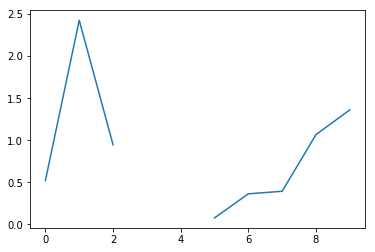

In [98]:
dpdf.A.plot()

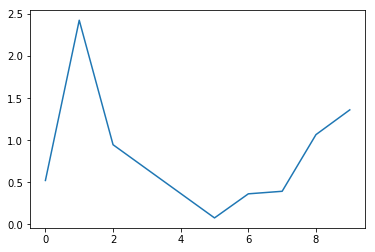

In [97]:
dpdf.A.interpolate().plot()

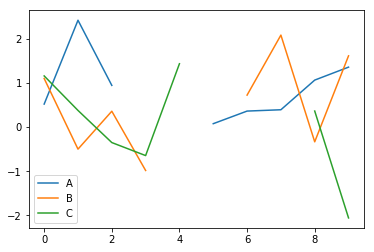

In [99]:
dpdf.plot()

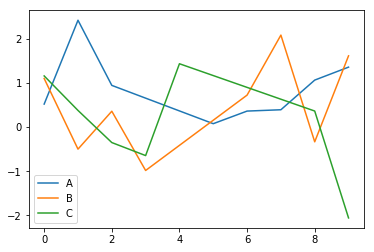

In [100]:
dpdf.interpolate().plot()

In [163]:
rng1 = pd.date_range('1/3/2000', periods=10, freq='40D')
indf = pd.DataFrame(np.random.rand(10),
                    columns=['value'],
                    index=rng1)
indf

,value
2000-01-03,0.666198
2000-02-12,0.186681
2000-03-23,0.267874
2000-05-02,0.584839
2000-06-11,0.393427
2000-07-21,0.306113
2000-08-30,0.042886
2000-10-09,0.137661
2000-11-18,0.819885
2000-12-28,0.365126


In [164]:
indf.iloc[3:5,0] = np.nan
indf.iloc[8:9,0] = np.nan

indf

,value
2000-01-03,0.666198
2000-02-12,0.186681
2000-03-23,0.267874
2000-05-02,NaN
2000-06-11,NaN
2000-07-21,0.306113
2000-08-30,0.042886
2000-10-09,0.137661
2000-11-18,NaN
2000-12-28,0.365126


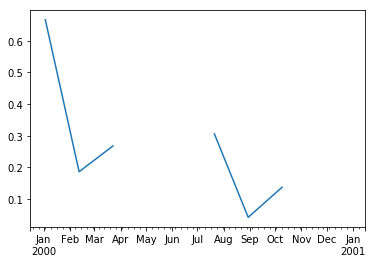

In [166]:
indf.value.plot()

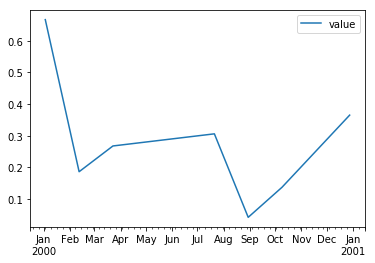

In [167]:
indf.interpolate().plot()

# Replacing Values

In [168]:
rdf = pd.DataFrame({'a': [0, 1, 2, 3, 4], 'b': [5, 6, 7, 8, 9]})
rdf

,a,b
0,0,5
1,1,6
2,2,7
3,3,8
4,4,9


In [170]:
rdf.replace({'a': 3, 'b': 5}, 100)

,a,b
0,0,100
1,1,6
2,2,7
3,100,8
4,4,9


In [172]:
rdf.replace([1, 3], method='pad')

,a,b
0,0,5
1,0,6
2,2,7
3,2,8
4,4,9


# String Replacement missing value

In [174]:
d = {'a': list(range(4)), 'b': list('ab..'), 'c': ['a', 'b', np.nan, 'd']}
rpdf = pd.DataFrame(d)
rpdf

,a,b,c
0,0,a,a
1,1,b,b
2,2,.,NaN
3,3,.,d


In [190]:
rpdf.shape

(4, 3)

In [175]:
rpdf.replace('.', np.nan)

,a,b,c
0,0,a,a
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


In [178]:
rpdf.replace(['a', '.'], ['b', np.nan])

,a,b,c
0,0,b,b
1,1,b,b
2,2,NaN,NaN
3,3,NaN,d


# Numeric Replacement missing value

In [194]:
ndf = pd.DataFrame(np.random.randn(10, 2))
ndf

,0,1
0,-0.569741,-1.049846
1,0.335575,-0.831657
2,1.659645,-0.338328
3,0.969294,-0.823967
4,-2.182009,2.291695
5,0.161198,-0.573234
6,0.257599,-0.956557
7,-0.071188,-0.204614
8,0.255255,0.211726
9,-0.299664,-0.694356


In [195]:
ndf.shape

(10, 2)

In [196]:
ndf[np.random.rand(ndf.shape[0]) > 0.5] = 1.5
ndf

,0,1
0,-0.569741,-1.049846
1,0.335575,-0.831657
2,1.500000,1.500000
3,0.969294,-0.823967
4,1.500000,1.500000
5,0.161198,-0.573234
6,0.257599,-0.956557
7,1.500000,1.500000
8,0.255255,0.211726
9,1.500000,1.500000


In [198]:
ndf.replace(1.5, 'less than 1.5')

,0,1
0,-0.569741,-1.04985
1,0.335575,-0.831657
2,less than 1.5,less than 1.5
3,0.969294,-0.823967
4,less than 1.5,less than 1.5
5,0.161198,-0.573234
6,0.257599,-0.956557
7,less than 1.5,less than 1.5
8,0.255255,0.211726
9,less than 1.5,less than 1.5


In [200]:
df00 = ndf.values[0, 0]
df00

-0.5697410542942491

## Replacing more than one value 

In [201]:
ndf.replace([1.5,df00], 'less than 1.5')

,0,1
0,less than 1.5,-1.04985
1,0.335575,-0.831657
2,less than 1.5,less than 1.5
3,0.969294,-0.823967
4,less than 1.5,less than 1.5
5,0.161198,-0.573234
6,0.257599,-0.956557
7,less than 1.5,less than 1.5
8,0.255255,0.211726
9,less than 1.5,less than 1.5
